<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from scipy.stats import zscore

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [451]:
#ваш код здесь
data = pd.read_csv('dst-3.0_16_1_hh_database.csv', delimiter=';')

In [452]:
df = data.copy()

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [453]:
#ваш код здесь
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [454]:
#ваш код здесь
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [455]:
#ваш код здесь
df.count()

Пол, возраст                       44744
ЗП                                 44744
Ищет работу на должность:          44744
Город, переезд, командировки       44744
Занятость                          44744
График                             44744
Опыт работы                        44576
Последнее/нынешнее место работы    44743
Последняя/нынешняя должность       44742
Образование и ВУЗ                  44744
Обновление резюме                  44744
Авто                               44744
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [456]:
#ваш код здесь
df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [457]:
#ваш код здесь
df['Образование'] = df['Образование и ВУЗ'].apply(lambda x: x.split(' образование')[0].lower())
df = df.drop(['Образование и ВУЗ'], axis=1)
display(df['Образование'].unique())
display(df['Образование'].value_counts())

array(['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее'],
      dtype=object)

Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [458]:
#ваш код здесь
df['Пол'] = df['Пол, возраст'].apply(lambda x: x[0])
display(df['Пол'].unique())
df['Возраст'] = df['Пол, возраст'].apply(lambda x: int(x.split(' ')[3]))
display(df['Возраст'].unique())
df = df.drop(['Пол, возраст'], axis=1)
display(df['Пол'].value_counts(normalize=True))
display(df['Возраст'].mean())

array(['М', 'Ж'], dtype=object)

array([ 39,  60,  36,  38,  26,  29,  46,  34,  35,  59,  27,  21,  31,
        37,  30,  33,  42,  32,  23,  28,  25,  24,  43,  53,  49,  44,
        48,  54,  22,  20,  40,  62,  72,  45,  41,  61,  50,  58,  57,
        52,  56,  18,  19,  51,  16,  47,  71,  63,  55,  64,  68,  17,
        73,  66,  65,  77,  67,  69,  76,  70,  14,  15, 100])

Пол
М    0.809293
Ж    0.190707
Name: proportion, dtype: float64

32.19674146254246

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [459]:
#ваш код здесь
def convert_to_months(experience):
    # Находим количество лет
    years_match = re.search(r'(\d+)\s*(год|года|лет)', experience)

    # Находим количество месяцев
    months_match = re.search(r'(\d+)\s*(месяц|месяца|месяцев)', experience)

    # Начальная сумма месяцев
    total_months = 0

    # Если есть годы, добавляем их как месяцы
    if years_match:
        total_months += int(years_match.group(1)) * 12

    # Если есть месяцы, добавляем их
    if months_match:
        total_months += int(months_match.group(1))
    
    return total_months

def process_experience(experience):

    # Проверяем на нан и "Не указано"
    if pd.isna(experience) or experience in ['Не указано']:
        return np.nan
    
    # Для остального:
    return int(convert_to_months(experience.split('  ')[0][12:]))

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(process_experience)
display(df['Опыт работы (месяц)'].median())
df = df.drop(['Опыт работы'], axis=1)

100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [460]:
#ваш код здесь
def city(line):
    city_name = line.split(' ')[0]

    # Поиск города в списке из Москвы и СПб
    if city_name in ['Москва', 'Санкт-Петербург']:
        return city_name
    
    # Поиск среди городов милионников
    elif city_name in ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']:
        return 'город-миллионник'
    
    # Если ничего  из вышеперечисленного 
    else:
        return 'другие'



df['Город'] = df['Город, переезд, командировки'].apply(city)
display(df['Город'].unique())
print('Процент соискателей из СПб: ', round(len(df[df['Город']=='Санкт-Петербург'])/ len(df) * 100), '%')


def is_ready_to_relocate(description):

    if 'не готов к переезду' in description or 'не готова к переезду' in description:
        return False
    else:
        return True
    

df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(lambda x: is_ready_to_relocate(x))
display(df['Готовность к переезду'].unique())

def is_ready_to_work_trips(description):
    if 'не готов к командировкам' in description or 'не готова к командировкам' in description:
        return False
    elif 'командир' not in description:
        return False
    else:
        return True
    

df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(lambda x: is_ready_to_work_trips(x.split('пере')[1]))
display(df['Готовность к командировкам'].unique())
print('Процент соискателей готовых одновременно и к переездам, и к командировкам: ', round(len(df[(df['Готовность к переезду'] == True) & (df['Готовность к командировкам'] == True)]) / len(df) * 100), '%')

df = df.drop(['Город, переезд, командировки'], axis=1)

array(['другие', 'Москва', 'город-миллионник', 'Санкт-Петербург'],
      dtype=object)

Процент соискателей из СПб:  11 %


array([False,  True])

array([False,  True])

Процент соискателей готовых одновременно и к переездам, и к командировкам:  32 %


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [461]:
#ваш код здесь
for category in ['частичная занятость', 'проектная работа', 'полная занятость', 'стажировка', 'волонтерство']:
    df[category] = df['Занятость'].apply(lambda x: category in x)

for category in ['гибкий график', 'полный день', 'сменный график', 'вахтовый метод', 'удаленная работа']:
    df[category] = df['График'].apply(lambda x: category in x)

print('Людей ищут проектную работу и волонтёрство', len(df[(df['проектная работа'] == True) & (df['волонтерство'] == True)]))
print('Людей ищут хотят работать вахтовым методом и с гибким графиком', len(df[(df['вахтовый метод'] == True) & (df['гибкий график'] == True)]))

df = df.drop(['Занятость', 'График'], axis=1)

Людей ищут проектную работу и волонтёрство 436
Людей ищут хотят работать вахтовым методом и с гибким графиком 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [462]:
#ваш код здесь
# Загружаем данные по валютам
currency_df = pd.read_csv('ExchangeRates.csv')

df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме']).dt.date
df['цифра'] = df['ЗП'].apply(lambda x: int(x.split(' ')[0]))
df['валюта'] = df['ЗП'].apply(lambda x: x.split(' ')[1])
df['валюта'] = df['валюта'].replace({'грн.': 'UAH', 'бел.руб.': 'BYN', 'сум': 'UZS', 'руб.': 'RUB'})

# Преобразование столбца "Обновление резюме" в datetime в df
df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме'], errors='coerce')

# Преобразование столбца "date" в datetime в currency_df
currency_df['date'] = pd.to_datetime(currency_df['date'], errors='coerce')

# Проверяем типы данных
print(df['Обновление резюме'].dtype)  # Должно быть datetime64[ns]
print(currency_df['date'].dtype)     # Должно быть datetime64[ns]

# Соединение таблиц по валюте и дате
merged_df = pd.merge(
    df,
    currency_df,
    left_on=['валюта', 'Обновление резюме'],
    right_on=['currency', 'date'],
    how='left'
)

# Результат
merged_df.loc[merged_df['валюта'] == 'RUB', ['close', 'proportion']] = 1

merged_df['ЗП (руб)'] = merged_df['close'] / merged_df['proportion'] * merged_df['цифра']
print('Средняя зп:', merged_df['ЗП (руб)'].median())

df = merged_df.drop(['цифра', 'валюта',  'currency', 'per', 'date', 'time', 'close', 'vol', 'proportion', 'ЗП'], axis=1)
df

/var/folders/nw/wstvwph56z7_gyk5mj2vy5d00000gn/T/ipykernel_34863/3073482644.py:5: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Обновление резюме'] = pd.to_datetime(df['Обновление резюме']).dt.date
/var/folders/nw/wstvwph56z7_gyk5mj2vy5d00000gn/T/ipykernel_34863/3073482644.py:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  currency_df['date'] = pd.to_datetime(currency_df['date'], errors='coerce')


datetime64[ns]
datetime64[ns]
Средняя зп: 59000.0


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,полная занятость,стажировка,волонтерство,гибкий график,полный день,сменный график,вахтовый метод,удаленная работа,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,...,True,True,False,False,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,высшее,М,60,233.0,другие,...,True,True,False,False,True,True,True,False,True,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,True,False,False,False,True,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,высшее,М,38,225.0,другие,...,True,True,False,False,True,False,False,False,True,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,Москва,...,False,True,False,False,False,True,False,False,False,140000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Финансист, аналитик, экономист, бухгалтер, мен...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22,Не указано,высшее,М,30,91.0,другие,...,False,True,False,False,False,True,False,False,True,50000.0
44740,"Системный администратор, IT-специалист",ИП Пестрецов,Предприниматель,2019-04-22,Не указано,высшее,М,27,84.0,другие,...,True,True,False,False,True,True,True,False,True,39000.0
44741,"Аналитик данных, Математик","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-04-09,Не указано,высшее,Ж,48,257.0,город-миллионник,...,False,True,False,False,False,True,False,False,True,40000.0
44742,Контент-менеджер,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,высшее,М,24,46.0,другие,...,False,True,False,False,False,False,False,False,True,20000.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

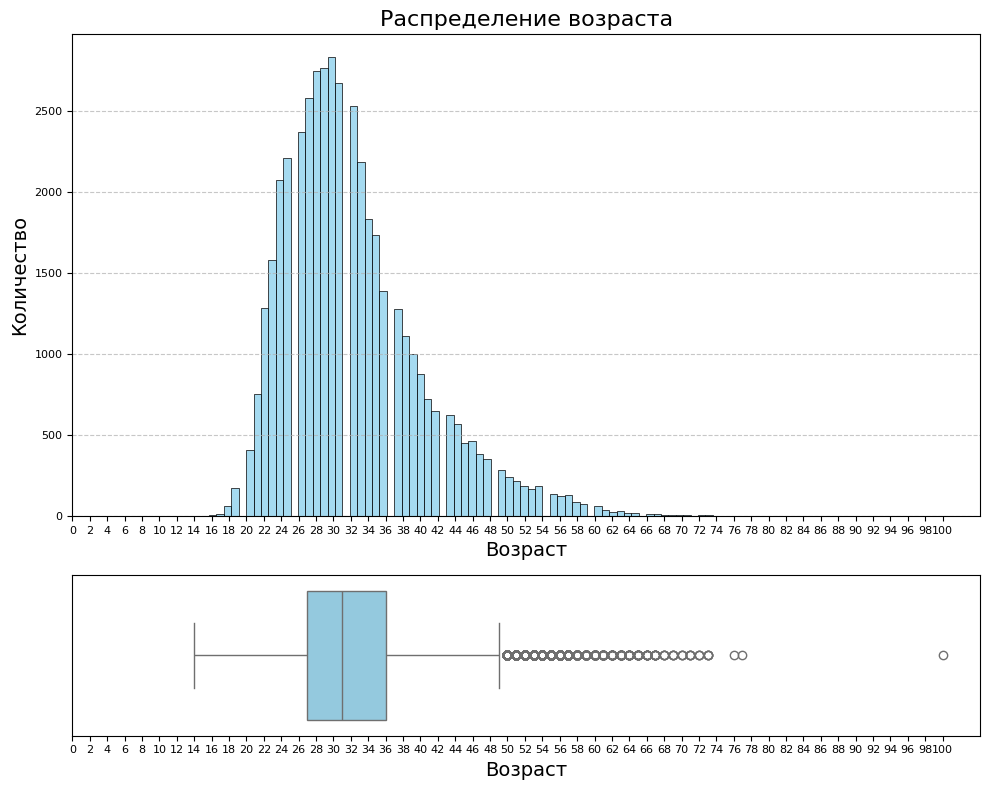

Мода:  0    30
Name: Возраст, dtype: int64
Минимум:  14
Максимум:  100


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,полная занятость,стажировка,волонтерство,гибкий график,полный день,сменный график,вахтовый метод,удаленная работа,ЗП (руб)
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,...,True,True,True,False,True,True,False,False,True,60000.0


In [463]:
# ваш код здесь
# Создание фигуры с двумя графиками
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Гистограмма
sns.histplot(df['Возраст'], bins=101, kde=False, color='skyblue', edgecolor='black', ax=ax[0])
ax[0].set_title('Распределение возраста', fontsize=16)
ax[0].set_xlabel('Возраст', fontsize=14)
ax[0].set_ylabel('Количество', fontsize=14)
ax[0].set_xticks(np.linspace(0, 100, 51))
ax[0].tick_params(axis='x', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Боксплот
sns.boxplot(x=df['Возраст'], ax=ax[1], color='skyblue')
ax[1].set_xlabel('Возраст', fontsize=14)
ax[1].set_xticks(np.linspace(0, 100, 51))
ax[1].tick_params(axis='x', labelsize=8)
ax[1].set_yticks([])  # Убираем метки на оси Y

# Финальный показ графиков
plt.tight_layout()
plt.show()

print('Мода: ',  df['Возраст'].mode())
print('Минимум: ',  df['Возраст'].min())
print('Максимум: ',  df['Возраст'].max())
display(df[df['Возраст'] == 100])

ваши выводы по графику здесь

Вывод:
Как видно из барплота, возраста имеют логнормальное распределение.
Наиболее часто встречающимся возрастом является 30 - что логично, поскольку в районе данного возраста находится наиболее работоспособная часть населения.
Возраст большинства соискателей находится в диапазоне 18 - 50 лет. При этом встречаются и более предельные значения, 14 - минимальное (законодаательство РФ позволяет работать начиная с данного возраста, поэтому это не является ошибкой). Максимальный возраст 100 - опять же, люди живут до такого возраста и могу, в принципе, работать, однако здесь это уже маловероятно и можно заподозрить ошибку. Поскольку подобное резюме одно, его возможно посмотреть вручную, при этом оно сильно больше возраста большинства соискателей, поэтому в любом случае является очевидным статистическим выбросом.
А уже взглянув на информацию по данному человеку, видим, что при возрасте 100 - общий опыт работы 30 месяцев - очень мало, при этом соискатель претендует на должность фронтенда, что маловероятно в его возрасте. Можн сделать вывод, что в указанном возрасте ошибка.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

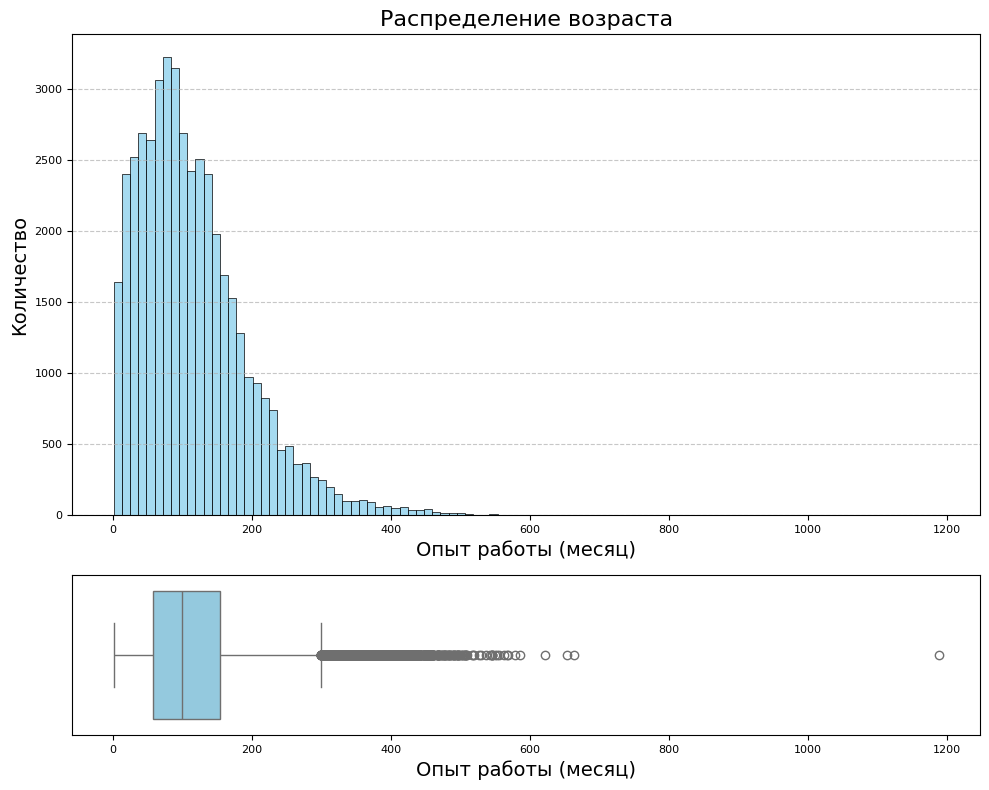

Мода:  0    81.0
Name: Опыт работы (месяц), dtype: float64
Минимум:  1.0
Максимум:  1188.0


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,полная занятость,стажировка,волонтерство,гибкий график,полный день,сменный график,вахтовый метод,удаленная работа,ЗП (руб)
40015,Системный администратор Windows,АО ТК Горизонт,Начальник отдела информационных технологий,2019-04-16,Не указано,высшее,М,48,1188.0,город-миллионник,...,False,True,False,False,True,True,False,True,True,60000.0


In [464]:
# ваш код здесь
# Создание фигуры с двумя графиками
fig, ax = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Гистограмма
sns.histplot(df['Опыт работы (месяц)'], bins=101, kde=False, color='skyblue', edgecolor='black', ax=ax[0])
ax[0].set_title('Распределение возраста', fontsize=16)
ax[0].set_xlabel('Опыт работы (месяц)', fontsize=14)
ax[0].set_ylabel('Количество', fontsize=14)
# ax[0].set_xticks(np.linspace(0, 100, 51))
ax[0].tick_params(axis='x', labelsize=8)
ax[0].tick_params(axis='y', labelsize=8)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Боксплот
sns.boxplot(x=df['Опыт работы (месяц)'], ax=ax[1], color='skyblue')
ax[1].set_xlabel('Опыт работы (месяц)', fontsize=14)
# ax[1].set_xticks(np.linspace(0, 100, 51))
ax[1].tick_params(axis='x', labelsize=8)
ax[1].set_yticks([])  # Убираем метки на оси Y

# Финальный показ графиков
plt.tight_layout()
plt.show()

print('Мода: ',  df['Опыт работы (месяц)'].mode())
print('Минимум: ',  df['Опыт работы (месяц)'].min())
print('Максимум: ',  df['Опыт работы (месяц)'].max())
display(df[df['Опыт работы (месяц)'] == 1188])

ваши выводы здесь

Вывод:
Распределение опять же имеет логнормальное распределение.
Мода распределения состваляет 81.
Для большинства соискателей распределение опыта работы находится в диапазоне примерно 0 - 300 месяцев.
Аномалии присутствуют, например, максимаум - 1188. такой опыт работы в целом представить трудно (99 лет), а при возрасте 48 лет - мечта любого работадателя, однако, такое физически  невозможно. Поэтому данный случай является очевидным  выбросом.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


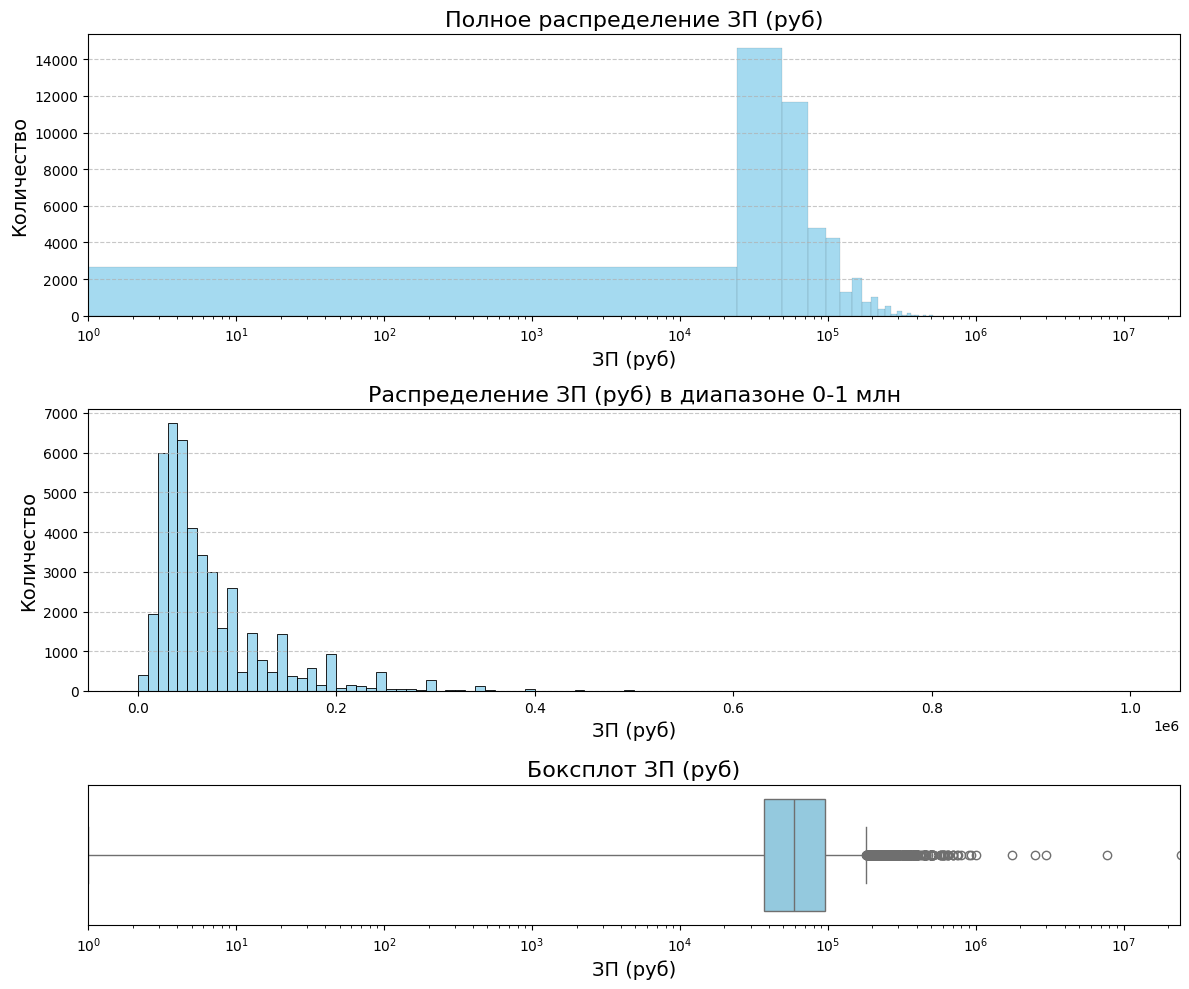

Мода:  50000.0
Минимум:  1.0
Максимум:  24304876.0


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,полная занятость,стажировка,волонтерство,гибкий график,полный день,сменный график,вахтовый метод,удаленная работа,ЗП (руб)
1087,"Директор по продукту {Internet, Blockchain}",EXSCUDO,Директор по продукту,2019-04-26,Не указано,высшее,М,36,142.0,Москва,...,False,True,False,False,False,True,False,False,False,1.0
6991,Контент-менеджер,"ООО ""Ориджинал Бутик""",Администратор сайта,2019-04-22,Не указано,неоконченное высшее,М,27,83.0,другие,...,False,True,False,False,True,True,False,False,True,1.0
12802,"Помощник IT - специалиста, маркетолога. Удален...",ООО Охрана Сервис,Продавец-консультант,2019-04-15,Не указано,среднее специальное,М,22,48.0,город-миллионник,...,True,True,True,True,True,True,True,True,True,1.0
16521,SEO-оптимизатор,"АН ""Счастливый дом""",SEO-оптимизатор,2019-04-25,Не указано,высшее,М,20,15.0,другие,...,True,True,True,False,True,True,True,False,True,1.0
17954,Менеджер проектов,Free,Свободный художник,2019-04-12,Не указано,высшее,М,43,236.0,Москва,...,True,True,True,False,True,True,True,True,True,1.0
20964,Директор по продажам /Руководитель отдела продаж,Марвел,начальник отдела Huawei Enterprise,2019-04-25,Не указано,высшее,М,36,166.0,Москва,...,False,True,False,False,False,True,False,False,False,1.0
21313,"Директор по продукту {Internet, Blockchain}",EXSCUDO,Директор по продукту,2019-05-07,Не указано,высшее,М,37,142.0,Москва,...,False,True,False,False,False,True,False,False,False,1.0
28353,Системный администратор/стажёр,"ООО ""Ориджинал Бутик""",Администратор сайта,2019-04-26,Не указано,неоконченное высшее,М,27,83.0,другие,...,False,True,True,False,True,True,False,False,False,1.0
35016,Менеджер проектов (телеком/интеграторы),"АО ""ЭР Телеком-Холдинг""",Менеджер проектов,2019-04-22,Не указано,высшее,М,34,144.0,Москва,...,False,True,False,False,True,True,True,False,False,1.0
36672,Программист Java (удалённо),Diasoft,Инженер-программист,2019-04-26,Не указано,неоконченное высшее,М,34,137.0,другие,...,True,True,False,False,True,True,True,True,True,1.0


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,полная занятость,стажировка,волонтерство,гибкий график,полный день,сменный график,вахтовый метод,удаленная работа,ЗП (руб)
6931,"Программирование, Разработка или Системный адм...","Евразийский банк, АО",Главный специалист Отдел разработки систем роз...,2019-04-22,Не указано,высшее,М,31,115.0,другие,...,True,True,False,False,True,True,True,False,True,24304876.0


In [465]:
# ваш код здесь
# Создание фигуры с тремя графиками
fig, ax = plt.subplots(3, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [2, 2, 1]})

# Полная гистограмма с логарифмической шкалой
sns.histplot(df['ЗП (руб)'], bins=1000, kde=False, color='skyblue', edgecolor='black', ax=ax[0])
ax[0].set_title('Полное распределение ЗП (руб)', fontsize=16)
ax[0].set_xlabel('ЗП (руб)', fontsize=14)
ax[0].set_ylabel('Количество', fontsize=14)
ax[0].tick_params(axis='x', labelsize=10)
ax[0].tick_params(axis='y', labelsize=10)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)
ax[0].set_xscale('log')  # Логарифмическая шкала
ax[0].set_xlim(1, 24000000)  # Устанавливаем полный диапазон

# Гистограмма для основного диапазона
focus_range = df[df['ЗП (руб)'] <= 1000000]
sns.histplot(focus_range['ЗП (руб)'], bins=100, kde=False, color='skyblue', edgecolor='black', ax=ax[1])
ax[1].set_title('Распределение ЗП (руб) в диапазоне 0-1 млн', fontsize=16)
ax[1].set_xlabel('ЗП (руб)', fontsize=14)
ax[1].set_ylabel('Количество', fontsize=14)
ax[1].tick_params(axis='x', labelsize=10)
ax[1].tick_params(axis='y', labelsize=10)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Боксплот
sns.boxplot(x=df['ЗП (руб)'], ax=ax[2], color='skyblue')
ax[2].set_title('Боксплот ЗП (руб)', fontsize=16)
ax[2].set_xlabel('ЗП (руб)', fontsize=14)
ax[2].tick_params(axis='x', labelsize=10)
ax[2].set_yticks([])  # Убираем метки на оси Y
ax[2].set_xscale('log')  # Логарифмическая шкала для боксплота
ax[2].set_xlim(1, 24000000)  # Устанавливаем полный диапазон

# Финальный показ графиков
plt.tight_layout()
plt.show()

# Вывод основных статистик
print('Мода: ', df['ЗП (руб)'].mode()[0])
print('Минимум: ', df['ЗП (руб)'].min())
print('Максимум: ', df['ЗП (руб)'].max())
display(df[df['ЗП (руб)'] == 1])
display(df[df['ЗП (руб)'] == 24304876])

ваши выводы здесь

Вывод:
Мода распределения - 50000.
ЗП большинства соискателей находится в диапазоне примерно 1 - 100000 рублей. Предельные значеняи признака: минимум - 1.0, максимум:  24304876.
Анамалии очевидно присутствуют. Запрашиваемая зп в 1 рубль - не является референсом для работадателей, скорее всего была допущена ошибка. А таких соискателей аж 12 и в остальном их резюме заполнено хорошо, скорее всего - ошибка при заполнении. Наибольший запрос по зарплате - тоже выброс, как минимум статистический. Кончено кто-то может запрашивать подобного размера зарплату, однако столь большое число скорее исключение, чем правило и в дальнейшем его учет может привести к ошибке. В целом все запросы зп высше миллиона можно считать выбросами по той же причине.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

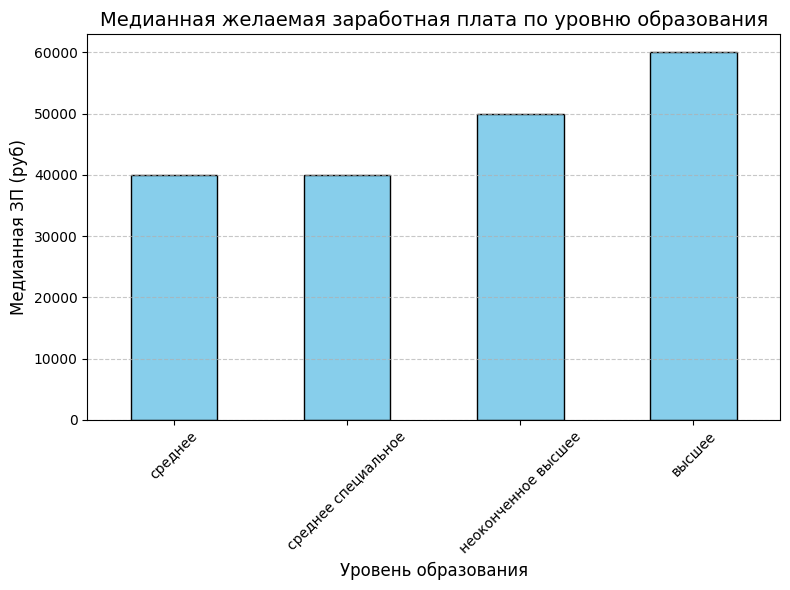

Образование
среднее                40000.0
среднее специальное    40000.0
неоконченное высшее    50000.0
высшее                 60000.0
Name: ЗП (руб), dtype: float64

In [466]:
# ваш код здесь
# Фильтрация данных: только зарплаты меньше 1 миллиона рублей
filtered_df = df[df['ЗП (руб)'] < 1_000_000]

# Расчет медианной зарплаты для каждого уровня образования
median_salary = filtered_df.groupby('Образование')['ЗП (руб)'].median().sort_values()

# Построение диаграммы
plt.figure(figsize=(8, 6))
median_salary.plot(kind='bar', color='skyblue', edgecolor='black')

# Настройка графика
plt.title('Медианная желаемая заработная плата по уровню образования', fontsize=14)
plt.ylabel('Медианная ЗП (руб)', fontsize=12)
plt.xlabel('Уровень образования', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Показ диаграммы
plt.tight_layout()
plt.show()

# Вывод медианных значений для анализа
median_salary

ваши выводы здесь

Вывод:
Наибольшие запросы у людей с высшим образовнием. Со средним и средним-специальным запросы у людей одинаковые - минимум для всех категорий. 
Смотря на данную гистограмму, можно отметить, что уровень образования на прямую влияет на уровень ожидаемой зп. 

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

<Figure size 1000x600 with 0 Axes>

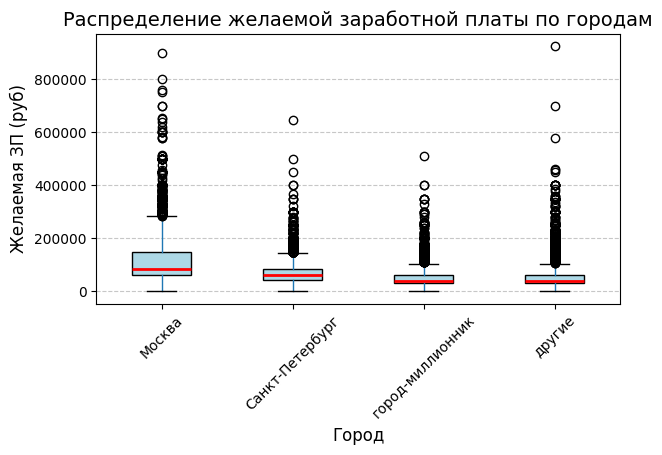

In [467]:
# ваш код здесь

# Построение boxplot для распределения зарплат по городам
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='ЗП (руб)', by='Город', grid=False, patch_artist=True,
                                boxprops=dict(facecolor='lightblue', color='black'),
                                medianprops=dict(color='red', linewidth=2))

# Настройка графика
plt.title('Распределение желаемой заработной платы по городам', fontsize=14)
plt.suptitle('') 
plt.xlabel('Город', fontsize=12)
plt.ylabel('Желаемая ЗП (руб)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Показ диаграммы
plt.tight_layout()
plt.show()

ваши выводы здесь

Вывод:
Можно заметить, что медианные уровни желаемой зарплаты отличаются, очевидно, для Мск и СПб эти значения выше (но не колоссально).
Признак города также важен при прогназировании зп, поскольку стоимость жизни в столицах, очевидно, выше, поэтому выши и запросы по зп.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

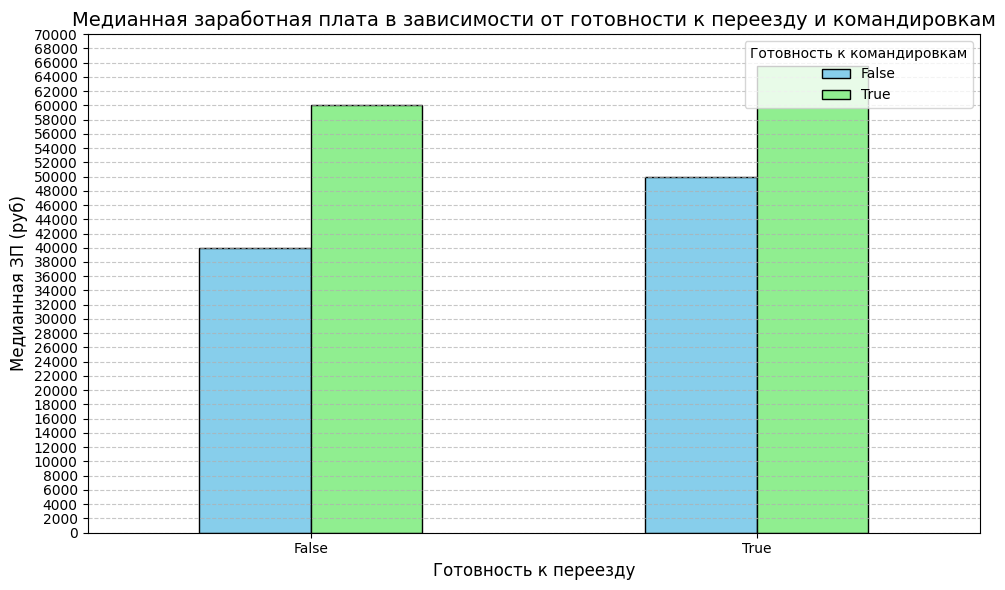

Готовность к командировкам,False,True
Готовность к переезду,,
False,40000.0,60000.0
True,50000.0,65535.0


In [468]:
# ваш код здесь
# Пример данных для демонстрации

# Расчет медианной зарплаты для каждого сочетания категорий
median_salary_by_categories = filtered_df.groupby(
    ['Готовность к переезду', 'Готовность к командировкам']
)['ЗП (руб)'].median().unstack()

# Построение многоуровневой столбчатой диаграммы
median_salary_by_categories.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'], edgecolor='black')

# Настройка графика
plt.title('Медианная заработная плата в зависимости от готовности к переезду и командировкам', fontsize=14)
plt.ylabel('Медианная ЗП (руб)', fontsize=12)
plt.xlabel('Готовность к переезду', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(np.linspace(0, 70000, 36))
plt.legend(title='Готовность к командировкам')
plt.grid(axis='y', linestyle="--", alpha=0.7)

# Показ диаграммы
plt.tight_layout()
plt.show()

# Вывод медианных значений для анализа
median_salary_by_categories


ваши выводы здесь

Вывод:
Готовность к переезду ассоциируется с более высокими зарплатами.
Готовность к командировкам приводит к значительному увеличению зарплаты. Причем переезд не так сильно влияет на запрашиваемую зп, нежели возможность наличия командировок.
Признаки "Готовность к переезду" и "Готовность к командировкам" влияют на зарплатные ожидания и важны при анализе рынка труда.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

/var/folders/nw/wstvwph56z7_gyk5mj2vy5d00000gn/T/ipykernel_34863/3110480434.py:2: FutureWarning: The provided callable <function median at 0x107afe020> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pivot_table = filtered_df.pivot_table(


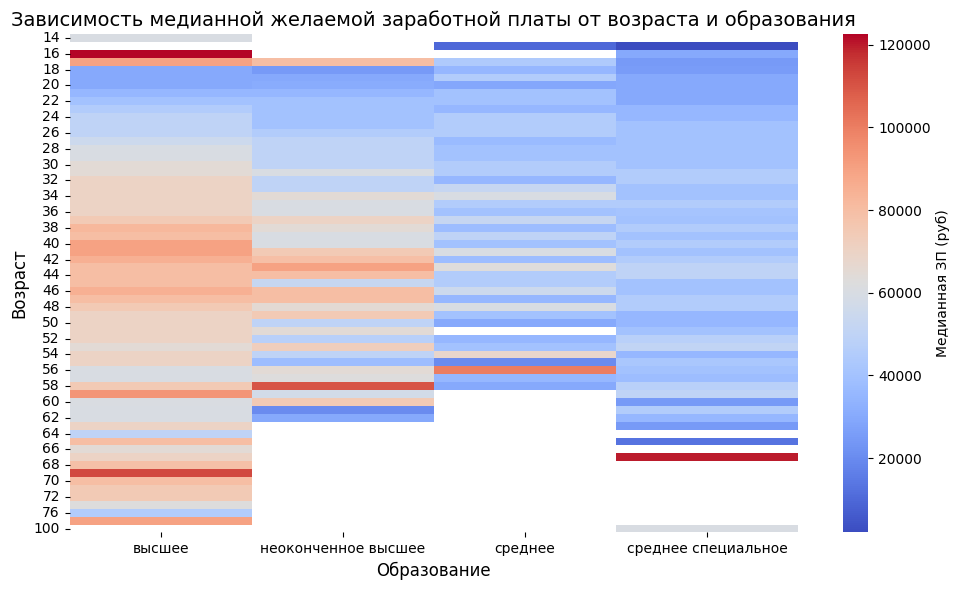

Образование,высшее,неоконченное высшее,среднее,среднее специальное
Возраст,,,,
14,60000.00,NaN,NaN,NaN
15,NaN,NaN,10000.0,2000.0
16,122582.49,NaN,NaN,30000.0
17,90075.50,80000.0,44000.0,25000.0
18,30000.00,25000.0,35000.0,25151.0
...,...,...,...,...
72,75000.00,NaN,NaN,NaN
73,62500.00,NaN,NaN,NaN
76,45000.00,NaN,NaN,NaN


In [469]:

# Создание сводной таблицы
pivot_table = filtered_df.pivot_table(
    values='ЗП (руб)',
    index='Возраст',
    columns='Образование',
    aggfunc=np.median
)

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, fmt=".0f", cmap="coolwarm", cbar_kws={"label": 'Медианная ЗП (руб)'})
plt.title('Зависимость медианной желаемой заработной платы от возраста и образования', fontsize=14)
plt.ylabel('Возраст', fontsize=12)
plt.xlabel('Образование', fontsize=12)

# Показ тепловой карты
plt.tight_layout()
plt.show()

# Вывод сводной таблицы для анализа
pivot_table


ваши выводы здесь

Вывод:

Возрастной фактор играет значимую роль: в возрастах 30–50 лет наблюдается пик зарплатных ожиданий для большинства уровней образования.

Люди с высшим образованием имеют более высокие зарплатные ожидания по сравнению с другими группами.

Уровень образования влияет на зарплатные ожидания, но связь варьируется в зависимости от возраста.  

Люди с средним или средним специальным образованием склонны запрашивать меньше независимо от возраста.  

Признаки возраста и уровня образования можно считать важными при прогнозировании зарплат.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

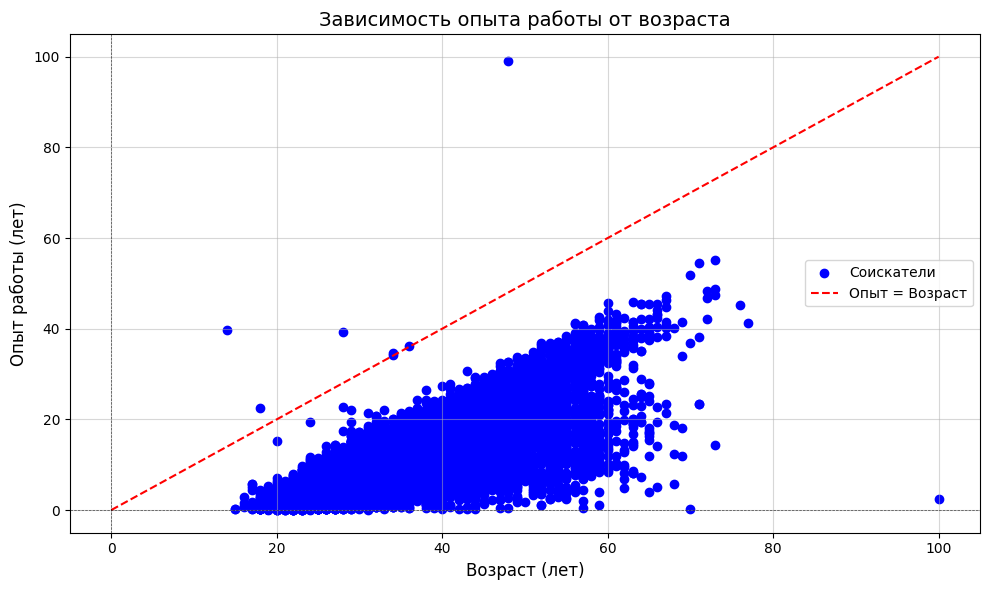

In [470]:
# ваш код здесь

# Перевод опыта работы из месяцев в года
df['Опыт работы (год)'] = df['Опыт работы (месяц)'] / 12

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(
    df['Возраст'],
    df['Опыт работы (год)'],
    color='blue',
    label='Соискатели'
)

# Добавление прямой y = x (опыт работы равен возрасту)
x = np.linspace(0, 100, 100)
y = x  # Прямая y = x
plt.plot(x, y, color='red', linestyle='--', label='Опыт = Возраст')

# Настройка графика
plt.title('Зависимость опыта работы от возраста', fontsize=14)
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Опыт работы (лет)', fontsize=12)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.7)
plt.axvline(0, color='black', linewidth=0.5, linestyle='--', alpha=0.7)
plt.legend()
plt.grid(alpha=0.5)

# Показ графика
plt.tight_layout()
plt.show()



ваши выводы здесь

Вывод:
Очевидно, те точки, которые лежат выше прямой "Опыт = Возраст" являются не просто выбрасами, но очевидно -  ошибками, Такие точки следует отфильтровывать.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


/var/folders/nw/wstvwph56z7_gyk5mj2vy5d00000gn/T/ipykernel_34863/2668482792.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


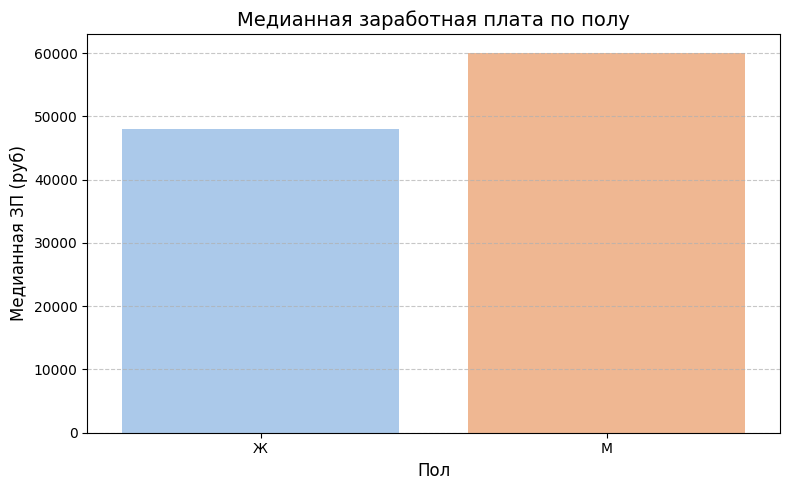

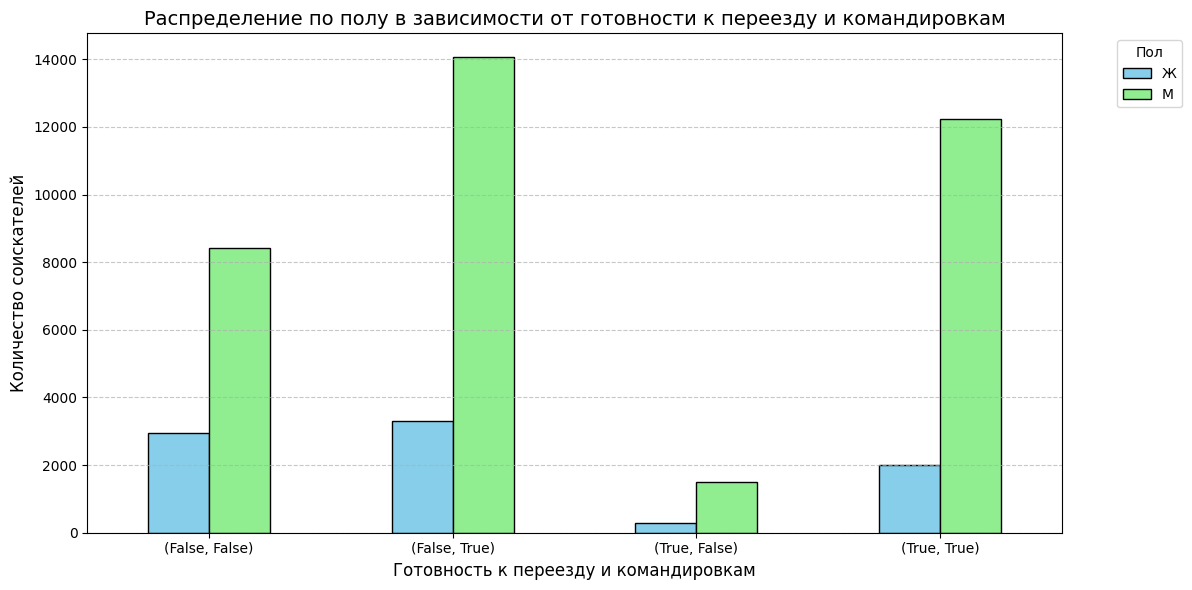

In [471]:
# ваш код здесь
# Убираем пропущенные значения для столбцов "Пол" и "ЗП (руб)"
filtered_df_gender = df.dropna(subset=['Пол', 'ЗП (руб)'])

# Считаем медианную заработную плату для каждой группы по полу
median_salary_by_gender = filtered_df_gender.groupby('Пол')['ЗП (руб)'].median()

# Построение столбчатой диаграммы
plt.figure(figsize=(8, 5))
sns.barplot(
    x=median_salary_by_gender.index,
    y=median_salary_by_gender.values,
    palette='pastel'
)

# Настройка графика
plt.title('Медианная заработная плата по полу', fontsize=14)
plt.xlabel('Пол', fontsize=12)
plt.ylabel('Медианная ЗП (руб)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Показ графика
plt.show()

# Расчет количества каждого пола для каждого сочетания категорий
gender_count_by_categories = df.groupby(
    ['Готовность к переезду', 'Готовность к командировкам', 'Пол']
).size().unstack(level=-1)

# Построение многоуровневой столбчатой диаграммы
gender_count_by_categories.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'lightgreen'], edgecolor='black')

# Настройка графика
plt.title('Распределение по полу в зависимости от готовности к переезду и командировкам', fontsize=14)
plt.ylabel('Количество соискателей', fontsize=12)
plt.xlabel('Готовность к переезду и командировкам', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Пол', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Показ диаграммы
plt.show()


ваши выводы здесь

Выводы:

1) Половая принадлежность влияет на размер запрашиваемой зарплаты.
Мужчины склонны запрашивать более высокую зп.

2) Очевидно, мужчины более легки на подъем и готовы к переезджам и командировкам. Причем разница ощутима великаа и при прогназировании возможности человека на как-либо переезд  или командировку, очень важно брать в учет принадлежность к одному из полов.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [472]:
# ваш код здесь
len_df = len(df)
df = df.drop_duplicates()
len_df_2 = len(df)
print('Количество дубликатов:  ', len_df-len_df_2)

Количество дубликатов:   161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [473]:
# ваш код здесь

missing_values = df.isnull().sum()
# Печать результатов
print('Число пропусков в каждом столбце:')
print(missing_values)


Число пропусков в каждом столбце:
Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
частичная занятость                  0
проектная работа                     0
полная занятость                     0
стажировка                           0
волонтерство                         0
гибкий график                        0
полный день                          0
сменный график                       0
вахтовый метод                       0
удаленная работа                     0
ЗП (руб)                             0
Опыт работы (год)                  168
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [474]:
# ваш код здесь
# Удаление строк с пропусками в столбцах 'Последнее/нынешнее место работы' и 'Последняя/нынешняя должность'
df = df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])

# Заполнение пропусков в столбце 'Опыт работы (месяц)' медианным значением
median_experience = df['Опыт работы (месяц)'].median()
df['Опыт работы (месяц)'] = df['Опыт работы (месяц)'].fillna(median_experience)

# Проверка, сколько строк осталось
missing_values_2 = df.isnull().sum()
# Печать результатов
print('Число пропусков в каждом столбце:')
print(missing_values_2)

print('Среднее значение в столбце "Опыт работы (месяц)" после заполнения пустот: ', df['Опыт работы (месяц)'].mean())

Число пропусков в каждом столбце:
Ищет работу на должность:            0
Последнее/нынешнее место работы      0
Последняя/нынешняя должность         0
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                  0
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
частичная занятость                  0
проектная работа                     0
полная занятость                     0
стажировка                           0
волонтерство                         0
гибкий график                        0
полный день                          0
сменный график                       0
вахтовый метод                       0
удаленная работа                     0
ЗП (руб)                             0
Опыт работы (год)                  168
dtype: int64
Среднее значение 

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [475]:
# ваш код здесь
len_1 = len(df)
df = df[(df['ЗП (руб)'] >= 1000) & (df['ЗП (руб)'] <= 1000000)]
len_2 = len(df)
print('Кол-во выбросов: ', len_1-len_2)

Кол-во выбросов:  89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [476]:
# ваш код здесь
outliers = df[df['Опыт работы (год)'] > df['Возраст']]
df = df[df['Опыт работы (год)'] <= df['Возраст']]
print(f'Количество удаленных строк: {outliers.shape[0]}')

Количество удаленных строк: 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

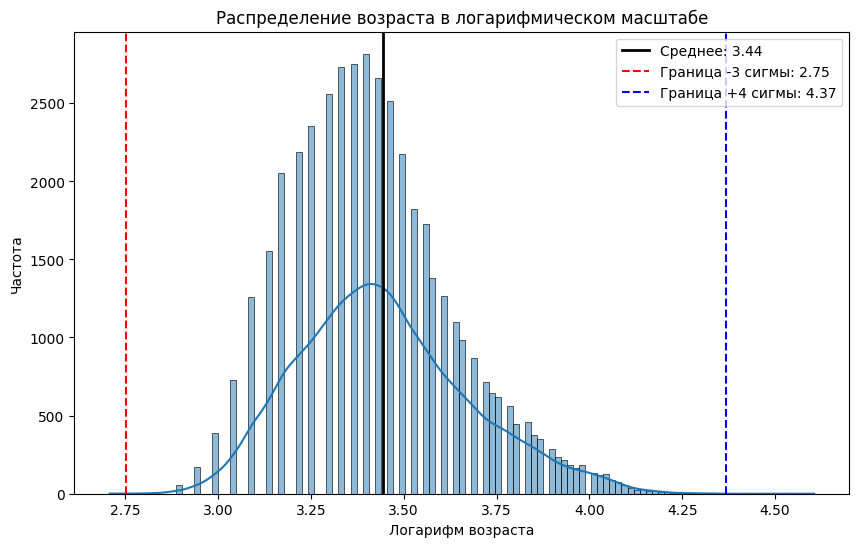

Таблица с выбросами:
       Возраст  log_Возраст   z_score
31137       15      2.70805 -3.194605
32950       15      2.70805 -3.194605
33654      100      4.60517  5.030857


In [477]:
# ваш код здесь
df['log_Возраст'] = np.log(df['Возраст'])

# Построим распределение признака 'log_Возраст'
plt.figure(figsize=(10, 6))
sns.histplot(df['log_Возраст'], kde=True)

# Среднее и стандартное отклонение
mean_log_age = df['log_Возраст'].mean()
std_log_age = df['log_Возраст'].std()

# Построим линии для среднего и границ метода 3 сигм (для левой стороны) и 4 сигм (для правой стороны)
plt.axvline(mean_log_age, color='k', lw=2, label=f'Среднее: {mean_log_age:.2f}')
plt.axvline(mean_log_age - 3 * std_log_age, color='r', ls='--', label=f'Граница -3 сигмы: {mean_log_age - 3 * std_log_age:.2f}')
plt.axvline(mean_log_age + 4 * std_log_age, color='b', ls='--', label=f'Граница +4 сигмы: {mean_log_age + 4 * std_log_age:.2f}')

plt.legend()
plt.title('Распределение возраста в логарифмическом масштабе')
plt.xlabel('Логарифм возраста')
plt.ylabel('Частота')
plt.show()

# Найдем выбросы с помощью z-отклонений
df['z_score'] = zscore(df['log_Возраст'])

# Отфильтруем выбросы:
# - Для левой стороны берем 3 сигмы
# - Для правой стороны берем 4 сигмы
outliers = df[(df['z_score'] < -3) | (df['z_score'] > 4)]
df_cleaned = df[(df['z_score'] >= -3) & (df['z_score'] <= 4)]
df_cleaned = df_cleaned.drop(['z_score', 'log_Возраст'], axis=1)

print('Таблица с выбросами:')
print(outliers[['Возраст', 'log_Возраст', 'z_score']])

ваш коммментарий здесь

Вывод:

Таким образом было найдено 3 выброса, которые статистически засоряют наши данные. При этом, поставив справа сигму=4 мы проявили "лояльность" к довольно высокой возрастной группе с возрастом в районе 70.